/var/folders/hr/lpbm_3jn03g8ytn87t3vnc680000gn/T/ipykernel_55818/2586276475.py:24: RuntimeWarning: invalid value encountered in divide
  sigma_afs = afstandc/afstandc*0.5


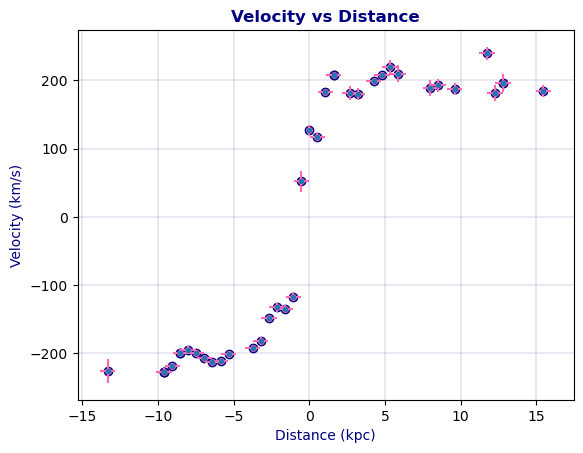

In [16]:
#!/usr/bin/env python3 # -*- coding: utf-8 -*-

"""
Rotation Curve of a Galaxy
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.special
from astropy.io import fits
from scipy.optimize import curve_fit

plt.close('all')

#Global constants
lmbd_em =  6564.61 # H-alpha wavelenght in AA
pixel_scale = 0.189 # arcsec per pixel
c = 3.0 * 10 ** 5 #speed of light [km/s]


#Load wavelength measurements 
data = np.genfromtxt('/Users/samakshkaushik/Desktop/Projects/Dark-matter-in-spiral-galaxy/NGC5676/filename.csv', skip_header=1, delimiter=',')
afstandc = np.array(data[:,3])
sigma_afs = afstandc/afstandc*0.5
lambdac = np.array(data[:,0])
sigma_lamb = np.array(data[:,2]) 


#beregner hastighed
z = lambdac/lmbd_em-1
zmean = np.mean(z)
vel = (z-zmean)/(1+zmean)*c
sigma_vel = sigma_lamb/lambdac*c 

###
# Python
plt.figure()
plt.grid(color='navy', linestyle='-', linewidth=0.25, alpha=0.5) # Navy grid lines
plt.title('Velocity vs Distance', color='navy', fontweight='bold') # Navy title
plt.errorbar(afstandc,vel,xerr=sigma_afs,yerr=sigma_vel,fmt='.', ecolor='hotpink') # Hotpink error bars
plt.ylabel('Velocity (km/s)', color='navy') # Navy y-label
plt.xlabel('Distance (kpc)', color='navy') # Navy x-label
plt.scatter(afstandc, vel, c='hotpink', edgecolors='navy') # Hotpink points with navy edges
plt.show()


